<a href="https://colab.research.google.com/github/nomchanz/graduation_thesis_new/blob/main/backwardNN_250_0_8_seed0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 必要なライブラリのimport
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential, Model, load_model
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Input, concatenate, BatchNormalization
from keras.optimizers import Adam
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

In [2]:
# データの準備、読み込み


## データファイルのpath
no_hole_path = 'no_hole_data.csv'
one_hole_size_path = 'one_hole_size_data.csv'
one_hole_position_path = 'one_hole_position_data.csv'
four_holes_size_path = 'four_holes_size_data.csv'
four_holes_position_path = 'four_holes_position_data.csv'
nine_holes_size_path = 'nine_holes_size_data.csv'
nine_holes_position_path = 'nine_holes_position_data.csv'
sixteen_holes_size_path = 'sixteen_holes_size_data.csv'
sixteen_holes_position_path = 'sixteen_holes_position_data.csv'
twentyfive_holes_size_path = 'twentyfive_holes_size_data.csv'
twentyfive_holes_position_path = 'twentyfive_holes_position_data.csv'

one_hole_position_raw_path = 'one_hole_position_data_raw.csv'
four_holes_position_raw_path = 'four_holes_position_data_raw.csv'
nine_holes_position_raw_path = 'nine_holes_position_data_raw.csv'
sixteen_holes_position_raw_path = 'sixteen_holes_position_data_raw.csv'
twentyfive_holes_position_raw_path = 'twentyfive_holes_position_data_raw.csv'


## csvファイルをリスト化

### 穴なしの温度分布データ
with open(no_hole_path) as f0:
  lst_f0 = list(csv.reader(f0))
lst_f0 = [r[:-1] for r in lst_f0]

### 大きさに関するデータ
with open(one_hole_size_path) as fs1:
  lst_fs1 = list(csv.reader(fs1))
with open(four_holes_size_path) as fs2:
  lst_fs2 = list(csv.reader(fs2))
with open(nine_holes_size_path) as fs3:
  lst_fs3 = list(csv.reader(fs3))
with open(sixteen_holes_size_path) as fs4:
  lst_fs4 = list(csv.reader(fs4))
with open(twentyfive_holes_size_path) as fs5:
  lst_fs5 = list(csv.reader(fs5))

### 位置に関するデータ
with open(one_hole_position_path) as fp1:
  lst_fp1 = list(csv.reader(fp1))
with open(four_holes_position_path) as fp2:
  lst_fp2 = list(csv.reader(fp2))
with open(nine_holes_position_path) as fp3:
  lst_fp3 = list(csv.reader(fp3))
with open(sixteen_holes_position_path) as fp4:
  lst_fp4 = list(csv.reader(fp4))
with open(twentyfive_holes_position_path) as fp5:
  lst_fp5 = list(csv.reader(fp5))

### raw位置に関するデータ
with open(one_hole_position_raw_path) as fp1_raw:
  lst_fp1_raw = list(csv.reader(fp1_raw))
with open(four_holes_position_raw_path) as fp2_raw:
  lst_fp2_raw = list(csv.reader(fp2_raw))
with open(nine_holes_position_raw_path) as fp3_raw:
  lst_fp3_raw = list(csv.reader(fp3_raw))
with open(sixteen_holes_position_raw_path) as fp4_raw:
  lst_fp4_raw = list(csv.reader(fp4_raw))
with open(twentyfive_holes_position_raw_path) as fp5_raw:
  lst_fp5_raw = list(csv.reader(fp5_raw))

In [3]:
# model_1

# データの前処理


## 変数設定(各条件を変えてたくさん試すため)
n = 250                    #nは総抽出データ数
train = 0.8                 #train:validのtrainデータの割合
seed = 0                       
random.seed(seed)           #乱数seed固定


## データ加工

### データ抽出(各データをランダムにシャッフル→train,valid,testに分割。各大きさのデータが同じ数だけ抽出される。)
for i in range (1,6):
  exec("dummy_lst_fs"+str(i)+"_shuffle = random.sample(lst_fs"+str(i)+", len(lst_fs"+str(i)+"))")  
  exec("dummy_lst_fs"+str(i)+"_train = dummy_lst_fs"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")       
  exec("dummy_lst_fs"+str(i)+"_valid = dummy_lst_fs"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]") 
  exec("dummy_lst_fs"+str(i)+"_test_samesize = dummy_lst_fs"+str(i)+"_shuffle["+str(int(n/5))+":"+str(int(n*2/5))+"]")  #拡張前と同数の拡張用データセットを作成                  
  exec("dummy_lst_fs"+str(i)+"_test = dummy_lst_fs"+str(i)+"_shuffle["+str(int(n/5))+":-1]")
  
  exec("lst_fp"+str(i)+"_shuffle = random.sample(lst_fp"+str(i)+", len(lst_fp"+str(i)+"))")
  exec("lst_fp"+str(i)+"_train = lst_fp"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")
  exec("lst_fp"+str(i)+"_valid = lst_fp"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]") 
  exec("lst_fp"+str(i)+"_test_samesize = lst_fp"+str(i)+"_shuffle["+str(int(n/5))+":"+str(int(n*2/5))+"]")  #拡張前と同数の拡張用データセットを作成         
  exec("lst_fp"+str(i)+"_test = lst_fp"+str(i)+"_shuffle["+str(int(n/5))+":-1]")

random.seed(seed)

for i in range(1,6):
  exec("lst_fs"+str(i)+"_shuffle = random.sample(lst_fs"+str(i)+", len(lst_fs"+str(i)+"))")  
  exec("lst_fs"+str(i)+"_train = lst_fs"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")       
  exec("lst_fs"+str(i)+"_valid = lst_fs"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]") 
  exec("lst_fs"+str(i)+"_test_samesize = lst_fs"+str(i)+"_shuffle["+str(int(n/5))+":"+str(int(n*2/5))+"]")  #拡張前と同数の拡張用データセットを作成         
  exec("lst_fs"+str(i)+"_test = lst_fs"+str(i)+"_shuffle["+str(int(n/5))+":-1]")
  
  exec("lst_fp"+str(i)+"_raw_shuffle = random.sample(lst_fp"+str(i)+"_raw, len(lst_fp"+str(i)+"_raw))")
  exec("lst_fp"+str(i)+"_raw_train = lst_fp"+str(i)+"_raw_shuffle[0:"+str(int(n/5*train))+"]")
  exec("lst_fp"+str(i)+"_raw_valid = lst_fp"+str(i)+"_raw_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]") 
  exec("lst_fp"+str(i)+"_raw_test_samesize = lst_fp"+str(i)+"_raw_shuffle["+str(int(n/5))+":"+str(int(n*2/5))+"]")  #拡張前と同数の拡張用データセットを作成         
  exec("lst_fp"+str(i)+"_raw_test = lst_fp"+str(i)+"_raw_shuffle["+str(int(n/5))+":-1]")

### train,valid,testの各々について、大きさ、位置、表面温度分布データに分割
for i in range (1,6):
  exec("lst_x_fs"+str(i)+"_train = [r[0] for r in lst_fs"+str(i)+"_train]")
  exec("lst_x_fp"+str(i)+"_train = [r[0] for r in lst_fp"+str(i)+"_train]")
  exec("lst_y"+str(i)+"_train = [r[1:-1] for r in lst_fp"+str(i)+"_train]")
  exec("lst_x_fs"+str(i)+"_valid = [r[0] for r in lst_fs"+str(i)+"_valid]")
  exec("lst_x_fp"+str(i)+"_valid = [r[0] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_y"+str(i)+"_valid = [r[1:-1] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_x_fs"+str(i)+"_test = [r[0] for r in lst_fs"+str(i)+"_test]")
  exec("lst_x_fp"+str(i)+"_test = [r[0] for r in lst_fp"+str(i)+"_test]")
  exec("lst_y"+str(i)+"_test = [r[1:-1] for r in lst_fp"+str(i)+"_test]")
  exec("lst_x_fs"+str(i)+"_test_samesize = [r[0] for r in lst_fs"+str(i)+"_test_samesize]")
  exec("lst_x_fp"+str(i)+"_test_samesize = [r[0] for r in lst_fp"+str(i)+"_test_samesize]")
  exec("lst_y"+str(i)+"_test_samesize = [r[1:-1] for r in lst_fp"+str(i)+"_test_samesize]")

  exec("lst_x_fp"+str(i)+"_raw_train = [r[0:2] for r in lst_fp"+str(i)+"_raw_train]")
  exec("lst_x_fp"+str(i)+"_raw_valid = [r[0:2] for r in lst_fp"+str(i)+"_raw_valid]")
  exec("lst_x_fp"+str(i)+"_raw_test = [r[0:2] for r in lst_fp"+str(i)+"_raw_test]")
  exec("lst_x_fp"+str(i)+"_raw_test_samesize = [r[0:2] for r in lst_fp"+str(i)+"_raw_test_samesize]")


### データを結合(入力データ・正解データの大枠完成)
lst_x_fs_train = lst_x_fs1_train + lst_x_fs2_train + lst_x_fs3_train + lst_x_fs4_train + lst_x_fs5_train
lst_x_fp_train = lst_x_fp1_train + lst_x_fp2_train + lst_x_fp3_train + lst_x_fp4_train + lst_x_fp5_train
lst_y_train = lst_y1_train + lst_y2_train + lst_y3_train + lst_y4_train + lst_y5_train

lst_x_fs_valid = lst_x_fs1_valid + lst_x_fs2_valid + lst_x_fs3_valid + lst_x_fs4_valid + lst_x_fs5_valid
lst_x_fp_valid = lst_x_fp1_valid + lst_x_fp2_valid + lst_x_fp3_valid + lst_x_fp4_valid + lst_x_fp5_valid
lst_y_valid = lst_y1_valid + lst_y2_valid + lst_y3_valid + lst_y4_valid + lst_y5_valid

lst_x_fs_test = lst_x_fs1_test + lst_x_fs2_test + lst_x_fs3_test + lst_x_fs4_test + lst_x_fs5_test
lst_x_fp_test = lst_x_fp1_test + lst_x_fp2_test + lst_x_fp3_test + lst_x_fp4_test + lst_x_fp5_test
lst_y_test = lst_y1_test + lst_y2_test + lst_y3_test + lst_y4_test + lst_y5_test
lst_x_fs_test_samesize = lst_x_fs1_test_samesize + lst_x_fs2_test_samesize + lst_x_fs3_test_samesize + lst_x_fs4_test_samesize + lst_x_fs5_test_samesize
lst_x_fp_test_samesize = lst_x_fp1_test_samesize + lst_x_fp2_test_samesize + lst_x_fp3_test_samesize + lst_x_fp4_test_samesize + lst_x_fp5_test_samesize
lst_y_test_samesize = lst_y1_test_samesize + lst_y2_test_samesize + lst_y3_test_samesize + lst_y4_test_samesize + lst_y5_test_samesize

lst_x_fp_raw_train = lst_x_fp1_raw_train + lst_x_fp2_raw_train + lst_x_fp3_raw_train + lst_x_fp4_raw_train + lst_x_fp5_raw_train
lst_x_fp_raw_valid = lst_x_fp1_raw_valid + lst_x_fp2_raw_valid + lst_x_fp3_raw_valid + lst_x_fp4_raw_valid + lst_x_fp5_raw_valid
lst_x_fp_raw_test = lst_x_fp1_raw_test + lst_x_fp2_raw_test + lst_x_fp3_raw_test + lst_x_fp4_raw_test + lst_x_fp5_raw_test
lst_x_fp_raw_test_samesize = lst_x_fp1_raw_test_samesize + lst_x_fp2_raw_test_samesize + lst_x_fp3_raw_test_samesize + lst_x_fp4_raw_test_samesize + lst_x_fp5_raw_test_samesize


### np.arrayで変換
lst_f0 = np.array(lst_f0, dtype=float)
lst_x_fs_train = np.array(lst_x_fs_train, dtype=int)
lst_x_fp_train = np.array(lst_x_fp_train, dtype=int)
lst_x_fs_valid = np.array(lst_x_fs_valid, dtype=int)
lst_x_fp_valid = np.array(lst_x_fp_valid, dtype=int)
lst_x_fs_test = np.array(lst_x_fs_test, dtype=int)
lst_x_fp_test = np.array(lst_x_fp_test, dtype=int)
lst_y_train = np.array(lst_y_train, dtype=float)
lst_y_valid = np.array(lst_y_valid, dtype=float)
lst_y_test = np.array(lst_y_test, dtype=float)

lst_x_fp_raw_train = np.array(lst_x_fp_raw_train, dtype=int)
lst_x_fp_raw_valid = np.array(lst_x_fp_raw_valid, dtype=int)
lst_x_fp_raw_test = np.array(lst_x_fp_raw_test, dtype=int)

lst_x_fs_test_samesize = np.array(lst_x_fs_test_samesize, dtype=int)
lst_x_fp_test_samesize = np.array(lst_x_fp_test_samesize, dtype=int)
lst_y_test_samesize = np.array(lst_y_test_samesize, dtype=float)
lst_x_fp_raw_test_samesize = np.array(lst_x_fp_raw_test_samesize, dtype=int)

### 大きさデータを二次元化
x_fs_train = lst_x_fs_train.reshape(-1, 1)
x_fs_valid = lst_x_fs_valid.reshape(-1, 1)
x_fs_test = lst_x_fs_test.reshape(-1, 1)
x_fs_test_samesize = lst_x_fs_test_samesize.reshape(-1, 1)
x_fp_train = lst_x_fp_train.reshape(-1, 1)
x_fp_valid = lst_x_fp_valid.reshape(-1, 1)
x_fp_test = lst_x_fp_test.reshape(-1, 1)
x_fp_test_samesize = lst_x_fp_test_samesize.reshape(-1, 1)

### 温度分布データを、穴なし温度分布データとの差に変換
y_train = lst_y_train - lst_f0
y_valid = lst_y_valid - lst_f0
y_test = lst_y_test - lst_f0
y_test_samesize = lst_y_test_samesize - lst_f0

### 入力データの正規化
scaler_x = MinMaxScaler()
x_fs_train_n = scaler_x.fit_transform(x_fs_train)
x_fs_valid_n = scaler_x.fit_transform(x_fs_valid)
x_fs_test_n = scaler_x.fit_transform(x_fs_test) 
x_fs_test_samesize_n = scaler_x.fit_transform(x_fs_test_samesize) 
x_fp_train_n = scaler_x.fit_transform(x_fp_train)
x_fp_valid_n = scaler_x.fit_transform(x_fp_valid)
x_fp_test_n = scaler_x.fit_transform(x_fp_test) 
x_fp_test_samesize_n = scaler_x.fit_transform(x_fp_test_samesize) 

x_fp_raw_train_n = scaler_x.fit_transform(lst_x_fp_raw_train)
x_fp_raw_valid_n = scaler_x.fit_transform(lst_x_fp_raw_valid)
x_fp_raw_test_n = scaler_x.fit_transform(lst_x_fp_raw_test)
x_fp_raw_test_samesize_n = scaler_x.fit_transform(lst_x_fp_raw_test_samesize)

In [4]:
# データ拡張
# 余りの全データ使用
## 作成済モデルでデータ生成

model = load_model(str(n)+"_random.seed("+str(seed)+")_train"+str(train)+"_raw.h5")
y_expand_data = model.predict([x_fs_test_n, x_fp_raw_test_n])
y_expand_data

array([[ 0.02319619,  0.02229923,  0.02286879, ...,  0.02107487,
         0.02161571,  0.01867886],
       [ 0.03245395,  0.03315631,  0.03350188, ...,  0.02877809,
         0.02865008,  0.02524645],
       [ 0.01041686,  0.00998722,  0.01031047, ...,  0.01529099,
         0.01697305,  0.01514962],
       ...,
       [-0.1378979 ,  0.07566537, -0.0435481 , ..., -0.35498375,
        -0.28178293, -0.34269705],
       [ 0.02881771,  0.00307916, -0.01778872, ..., -0.76609004,
        -0.86035734, -0.8668231 ],
       [ 1.5669502 ,  1.5518484 ,  1.5458173 , ...,  0.18696935,
         0.20646313,  0.19651595]], dtype=float32)

In [5]:
# データ拡張
# 余ったデータ全てではなく、拡張用も一部のみを利用
## 作成済モデルでデータ生成

model = load_model(str(n)+"_random.seed("+str(seed)+")_train"+str(train)+"_raw.h5")
y_expand_samesize_data = model.predict([x_fs_test_samesize_n, x_fp_raw_test_samesize_n])
y_expand_samesize_data

array([[ 0.023612  ,  0.02268227,  0.02324158, ...,  0.02133551,
         0.02193172,  0.01891517],
       [ 0.0321398 ,  0.03284669,  0.03319371, ...,  0.02863212,
         0.02848521,  0.02512557],
       [ 0.00985267,  0.00938765,  0.00971114, ...,  0.01574791,
         0.01737538,  0.01568843],
       ...,
       [-3.6437695 , -3.5167928 , -3.685279  , ..., -1.6234435 ,
        -1.6318684 , -1.5754365 ],
       [-0.1755374 , -0.16900383, -0.14933595, ..., -0.36932972,
        -0.4100943 , -0.4118839 ],
       [ 1.1904063 ,  1.1868272 ,  1.1855232 , ...,  0.51546097,
         0.52549046,  0.5265426 ]], dtype=float32)

In [6]:
## データセット作成

### 拡張前セット
X_not_expanded_data = np.concatenate([y_train, y_valid])
size_Y_not_expanded_data = np.concatenate([x_fs_train, x_fs_valid])
position_Y_not_expanded_data = np.concatenate([x_fp_train, x_fp_valid])

### 拡張前セット(nが2倍)
X_ne_ss_data = np.concatenate([y_train, y_valid, y_test_samesize])
size_Y_ne_ss_data = np.concatenate([x_fs_train, x_fs_valid, x_fs_test_samesize])
position_Y_ne_ss_data = np.concatenate([x_fp_train, x_fp_valid, x_fp_test_samesize])

### 拡張後セット(全データ使用)
X_data = np.concatenate([y_train, y_valid, y_expand_data])
size_Y_data = np.concatenate([x_fs_train, x_fs_valid, x_fs_test])
position_Y_data = np.concatenate([x_fp_train, x_fp_valid, x_fp_test])

### 拡張後セット(一部データ使用)
X_samesize_data = np.concatenate([y_train, y_valid, y_expand_samesize_data])
size_Y_samesize_data = np.concatenate([x_fs_train, x_fs_valid, x_fs_test_samesize])
position_Y_samesize_data = np.concatenate([x_fp_train, x_fp_valid, x_fp_test_samesize])

### 正解データセット
X_ans_data = np.concatenate([y_train, y_valid, y_test])
size_Y_ans_data = np.concatenate([x_fs_train, x_fs_valid, x_fs_test])
position_Y_ans_data = np.concatenate([x_fp_train, x_fp_valid, x_fp_test])

In [7]:
## データ加工
size_Y_data = keras.utils.to_categorical(size_Y_data, 6)
position_Y_data = keras.utils.to_categorical(position_Y_data, 26)

size_Y_samesize_data = keras.utils.to_categorical(size_Y_samesize_data, 6)
position_Y_samesize_data = keras.utils.to_categorical(position_Y_samesize_data, 26)

size_Y_not_expanded_data = keras.utils.to_categorical(size_Y_not_expanded_data, 6)
position_Y_not_expanded_data = keras.utils.to_categorical(position_Y_not_expanded_data, 26)

size_Y_ne_ss_data = keras.utils.to_categorical(size_Y_ne_ss_data, 6)
position_Y_ne_ss_data = keras.utils.to_categorical(position_Y_ne_ss_data, 26)

size_Y_ans_data = keras.utils.to_categorical(size_Y_ans_data, 6)
position_Y_ans_data = keras.utils.to_categorical(position_Y_ans_data, 26)

In [8]:
### train用とtest用に分割(4:1)
random.seed(seed)
X_train, X_test, size_Y_train, size_Y_test, position_Y_train, position_Y_test = train_test_split(X_data, size_Y_data, position_Y_data, test_size=0.20)
X_ss_train, X_ss_test, size_Y_ss_train, size_Y_ss_test, position_Y_ss_train, position_Y_ss_test = train_test_split(X_samesize_data, size_Y_samesize_data, position_Y_samesize_data, test_size=0.20)

random.seed(seed)
X_ne_train, X_ne_test, size_Y_ne_train, size_Y_ne_test, position_Y_ne_train, position_Y_ne_test = train_test_split(X_not_expanded_data, size_Y_not_expanded_data, position_Y_not_expanded_data, test_size=0.20)
X_ne_ss_train, X_ne_ss_test, size_Y_ne_ss_train, size_Y_ne_ss_test, position_Y_ne_ss_train, position_Y_ne_ss_test = train_test_split(X_ne_ss_data, size_Y_ne_ss_data, position_Y_ne_ss_data, test_size=0.20)

In [9]:
X_train = X_train.reshape(-1, 50, 1)
X_test = X_test.reshape(-1, 50, 1)
X_ss_train = X_ss_train.reshape(-1, 50, 1)
X_ss_test = X_ss_test.reshape(-1, 50, 1)
X_ne_train = X_ne_train.reshape(-1, 50, 1)
X_ne_test = X_ne_test.reshape(-1, 50, 1)
X_ne_ss_train = X_ne_ss_train.reshape(-1, 50, 1)
X_ne_ss_test = X_ne_ss_test.reshape(-1, 50, 1)
X_ans_data = X_ans_data.reshape(-1, 50, 1)

In [10]:
## CNN(大きさ)

### modelの作成
size_model = Sequential()
### 畳み込み層
size_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
size_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
size_model.add(Flatten())
### 全結合層
size_model.add(Dense(6, activation='softmax'))
### バッチ正規化
BatchNormalization()
### optimizer
adam = keras.optimizers.Adam()
###modelのコンパイル
size_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [11]:
# 学習(大きさ)
epochs = 500
batch_size = 128
size_history = size_model.fit(X_train, size_Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, size_Y_test))

Epoch 1/500
64/64 [==============================] - 1s 13ms/step - loss: 1.6396 - accuracy: 0.2255 - val_loss: 1.2315 - val_accuracy: 0.6565
Epoch 2/500
64/64 [==============================] - 0s 7ms/step - loss: 1.0962 - accuracy: 0.6734 - val_loss: 0.8076 - val_accuracy: 0.7828
Epoch 3/500
64/64 [==============================] - 0s 6ms/step - loss: 0.7337 - accuracy: 0.8817 - val_loss: 0.5804 - val_accuracy: 0.9107
Epoch 4/500
64/64 [==============================] - 0s 6ms/step - loss: 0.5300 - accuracy: 0.9282 - val_loss: 0.4292 - val_accuracy: 0.9378
Epoch 5/500
64/64 [==============================] - 0s 7ms/step - loss: 0.3888 - accuracy: 0.9436 - val_loss: 0.3377 - val_accuracy: 0.9403
Epoch 6/500
64/64 [==============================] - 0s 6ms/step - loss: 0.3131 - accuracy: 0.9469 - val_loss: 0.2732 - val_accuracy: 0.9467
Epoch 7/500
64/64 [==============================] - 0s 7ms/step - loss: 0.2529 - accuracy: 0.9516 - val_loss: 0.2330 - val_accuracy: 0.9457
Epoch 8/500


In [12]:
# モデルの評価(大きさ)
size_score = size_model.evaluate(X_ans_data, size_Y_ans_data, verbose=1)
print('Test loss:', size_score[0])
print('Test accuracy:', size_score[1])

317/317 [==============================] - 0s 1ms/step - loss: 3.7635 - accuracy: 0.9381
Test loss: 3.7635443210601807
Test accuracy: 0.9381046295166016


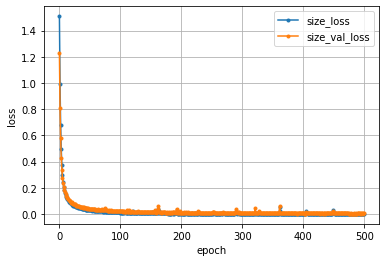

In [13]:
# 学習経過の可視化(大きさ)
size_loss     = size_history.history['loss']
size_val_loss = size_history.history['val_loss']

nb_epoch = len(size_loss)
plt.plot(range(nb_epoch), size_loss,     marker='.', label='size_loss')
plt.plot(range(nb_epoch), size_val_loss, marker='.', label='size_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

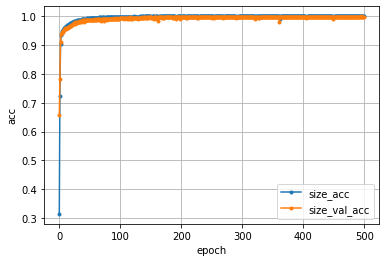

In [14]:
# 学習経過の可視化(大きさ)
size_acc     = size_history.history['accuracy']
size_val_acc = size_history.history['val_accuracy']

nb_epoch = len(size_acc)
plt.plot(range(nb_epoch), size_acc,     marker='.', label='size_acc')
plt.plot(range(nb_epoch), size_val_acc, marker='.', label='size_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [15]:
## 拡張前のデータの学習状況と比較

## CNN(大きさ)

### modelの作成
size_ne_model = Sequential()
### 畳み込み層
size_ne_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
size_ne_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
size_ne_model.add(Flatten())
### 全結合層
size_ne_model.add(Dense(6, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
size_ne_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [16]:
# 学習(大きさ)
epochs = 500
batch_size = 128
size_ne_history = size_ne_model.fit(X_ne_train, size_Y_ne_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_ne_test, size_Y_ne_test))

Epoch 1/500
2/2 [==============================] - 1s 200ms/step - loss: 1.7895 - accuracy: 0.1944 - val_loss: 1.7509 - val_accuracy: 0.3000
Epoch 2/500
2/2 [==============================] - 0s 40ms/step - loss: 1.7612 - accuracy: 0.1977 - val_loss: 1.7298 - val_accuracy: 0.3000
Epoch 3/500
2/2 [==============================] - 0s 216ms/step - loss: 1.7327 - accuracy: 0.2029 - val_loss: 1.7094 - val_accuracy: 0.3000
Epoch 4/500
2/2 [==============================] - 0s 44ms/step - loss: 1.7114 - accuracy: 0.1951 - val_loss: 1.6895 - val_accuracy: 0.2600
Epoch 5/500
2/2 [==============================] - 0s 42ms/step - loss: 1.6841 - accuracy: 0.2081 - val_loss: 1.6700 - val_accuracy: 0.2800
Epoch 6/500
2/2 [==============================] - 0s 39ms/step - loss: 1.6764 - accuracy: 0.1899 - val_loss: 1.6498 - val_accuracy: 0.2600
Epoch 7/500
2/2 [==============================] - 0s 43ms/step - loss: 1.6546 - accuracy: 0.2003 - val_loss: 1.6293 - val_accuracy: 0.2600
Epoch 8/500
2/2 [=

In [17]:
# モデルの評価(大きさ)
size_ne_score = size_ne_model.evaluate(X_ans_data, size_Y_ans_data, verbose=1)
print('Test loss:', size_ne_score[0])
print('Test accuracy:', size_ne_score[1])

317/317 [==============================] - 0s 1ms/step - loss: 1.0940 - accuracy: 0.9119
Test loss: 1.0940465927124023
Test accuracy: 0.9119447469711304


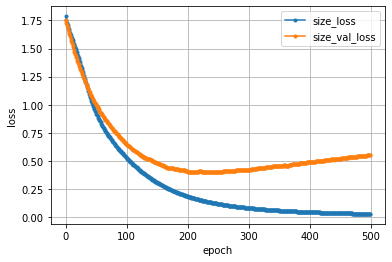

In [18]:
# 学習経過の可視化(大きさ)
size_loss     = size_ne_history.history['loss']
size_val_loss = size_ne_history.history['val_loss']

nb_epoch = len(size_loss)
plt.plot(range(nb_epoch), size_loss,     marker='.', label='size_loss')
plt.plot(range(nb_epoch), size_val_loss, marker='.', label='size_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

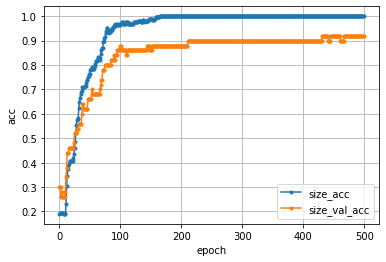

In [19]:
# 学習経過の可視化(大きさ)
size_acc     = size_ne_history.history['accuracy']
size_val_acc = size_ne_history.history['val_accuracy']

nb_epoch = len(size_acc)
plt.plot(range(nb_epoch), size_acc,     marker='.', label='size_acc')
plt.plot(range(nb_epoch), size_val_acc, marker='.', label='size_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [20]:
## CNN(位置)

### modelの作成
position_model = Sequential()
### 畳み込み層
position_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
position_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
position_model.add(Flatten())
### 全結合層
position_model.add(Dense(26, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
position_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [21]:
# 学習(位置)
epochs = 2000
batch_size = 128
position_history = position_model.fit(X_train, position_Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, position_Y_test))

Epoch 1/2000
64/64 [==============================] - 1s 9ms/step - loss: 3.0258 - accuracy: 0.1531 - val_loss: 2.5430 - val_accuracy: 0.2680
Epoch 2/2000
64/64 [==============================] - 0s 7ms/step - loss: 2.4438 - accuracy: 0.2982 - val_loss: 2.2300 - val_accuracy: 0.3421
Epoch 3/2000
64/64 [==============================] - 0s 7ms/step - loss: 2.1301 - accuracy: 0.3607 - val_loss: 2.0322 - val_accuracy: 0.4156
Epoch 4/2000
64/64 [==============================] - 0s 7ms/step - loss: 1.9617 - accuracy: 0.4081 - val_loss: 1.9197 - val_accuracy: 0.4294
Epoch 5/2000
64/64 [==============================] - 0s 7ms/step - loss: 1.8475 - accuracy: 0.4397 - val_loss: 1.8229 - val_accuracy: 0.4156
Epoch 6/2000
64/64 [==============================] - 0s 7ms/step - loss: 1.7445 - accuracy: 0.4719 - val_loss: 1.7574 - val_accuracy: 0.4659
Epoch 7/2000
64/64 [==============================] - 0s 7ms/step - loss: 1.6843 - accuracy: 0.4697 - val_loss: 1.6971 - val_accuracy: 0.4674
Epoch 

In [22]:
# モデルの評価(位置)
position_score = position_model.evaluate(X_ans_data, position_Y_ans_data, verbose=1)
print('Test loss:', position_score[0])
print('Test accuracy:', position_score[1])

317/317 [==============================] - 0s 1ms/step - loss: 4.4744 - accuracy: 0.6330
Test loss: 4.474384307861328
Test accuracy: 0.6329713463783264


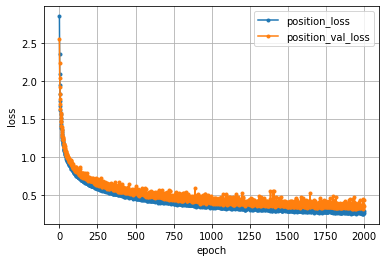

In [23]:
# 学習経過の可視化(位置)
position_loss     = position_history.history['loss']
position_val_loss = position_history.history['val_loss']

nb_epoch = len(position_loss)
plt.plot(range(nb_epoch), position_loss,     marker='.', label='position_loss')
plt.plot(range(nb_epoch), position_val_loss, marker='.', label='position_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

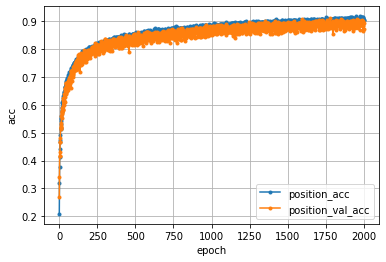

In [24]:
# 学習経過の可視化(位置)
position_acc     = position_history.history['accuracy']
position_val_acc = position_history.history['val_accuracy']

nb_epoch = len(position_acc)
plt.plot(range(nb_epoch), position_acc,     marker='.', label='position_acc')
plt.plot(range(nb_epoch), position_val_acc, marker='.', label='position_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [25]:
## CNN(位置)

### modelの作成
position_ne_model = Sequential()
### 畳み込み層
position_ne_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
position_ne_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
position_ne_model.add(Flatten())
### 全結合層
position_ne_model.add(Dense(26, activation='softmax'))
### バッチ正規化
BatchNormalization()
### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
position_ne_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [26]:
# 学習(位置)
epochs = 2000
batch_size = 128
position_ne_history = position_ne_model.fit(X_ne_train, position_Y_ne_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_ne_test, position_Y_ne_test))

Epoch 1/2000
2/2 [==============================] - 1s 191ms/step - loss: 3.2674 - accuracy: 0.0430 - val_loss: 3.2345 - val_accuracy: 0.0000e+00
Epoch 2/2000
2/2 [==============================] - 0s 42ms/step - loss: 3.2289 - accuracy: 0.0642 - val_loss: 3.2048 - val_accuracy: 0.0400
Epoch 3/2000
2/2 [==============================] - 0s 40ms/step - loss: 3.1924 - accuracy: 0.0939 - val_loss: 3.1741 - val_accuracy: 0.0600
Epoch 4/2000
2/2 [==============================] - 0s 37ms/step - loss: 3.1612 - accuracy: 0.0946 - val_loss: 3.1434 - val_accuracy: 0.0600
Epoch 5/2000
2/2 [==============================] - 0s 40ms/step - loss: 3.1341 - accuracy: 0.1031 - val_loss: 3.1131 - val_accuracy: 0.1000
Epoch 6/2000
2/2 [==============================] - 0s 41ms/step - loss: 3.0939 - accuracy: 0.1135 - val_loss: 3.0829 - val_accuracy: 0.1000
Epoch 7/2000
2/2 [==============================] - 0s 39ms/step - loss: 3.0616 - accuracy: 0.1224 - val_loss: 3.0542 - val_accuracy: 0.0800
Epoch 8/

In [27]:
# モデルの評価(位置)
position_ne_score = position_ne_model.evaluate(X_ans_data, position_Y_ans_data, verbose=1)
print('Test loss:', position_ne_score[0])
print('Test accuracy:', position_ne_score[1])

317/317 [==============================] - 1s 2ms/step - loss: 4.5978 - accuracy: 0.5756
Test loss: 4.597790241241455
Test accuracy: 0.5756169557571411


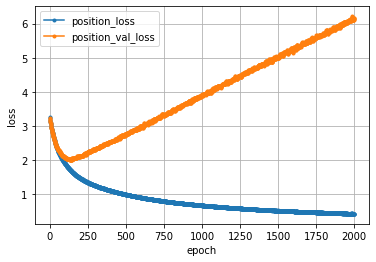

In [28]:
# 学習経過の可視化(位置)
position_loss     = position_ne_history.history['loss']
position_val_loss = position_ne_history.history['val_loss']

nb_epoch = len(position_loss)
plt.plot(range(nb_epoch), position_loss,     marker='.', label='position_loss')
plt.plot(range(nb_epoch), position_val_loss, marker='.', label='position_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

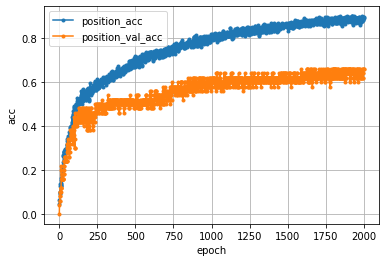

In [29]:
# 学習経過の可視化(位置)
position_acc     = position_ne_history.history['accuracy']
position_val_acc = position_ne_history.history['val_accuracy']

nb_epoch = len(position_acc)
plt.plot(range(nb_epoch), position_acc,     marker='.', label='position_acc')
plt.plot(range(nb_epoch), position_val_acc, marker='.', label='position_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()